# _classification notebook_

# <ins> A. Task definition and general information </ins> 

## Classificastion task - Predict Stroke
Our top priority in this health problem is to identify patients with a stroke. Therefore, we would like to identify any observation that may be a stroke.<br>
The data represents the population that comes to the emergency room with some suspicion of stroke. About 1/20 of them actually have a stroke. The aim of the model is to identify as many as possible of those who actually have a stroke and at the same time increase as much as possible the 1 \ X ratio between those who have a stroke and those who do not have a stroke (20> X as much as possible) of all people who identify the model as having a stroke.<br>
I chose this data and this task out of a personal touch on the matter. As an MDA medic, I think that already during the initial treatment, with the help of the ML model, the patient's problem can be better established.
In addition, the model will be able to provide a quick response to physicians and thus save time, reduce the amount of people with a reasonable suspicion of stroke and treat stroke cases more quickly.

## general knowledge:

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths, accounting for 6.2 million deaths. Approximately 17 million people had a stroke in 2010 and 33 million people have previously had a stroke and were still alive. Between 1990 and 2010 the number of strokes decreased by approximately 10% in the developed world and increased by 10% in the developing world.

The main risk factor for stroke is high blood pressure. Other risk factors include tobacco smoking, obesity, high blood cholesterol, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation.

(source - https://en.wikipedia.org/wiki/Stroke)

High blood pressure, high cholesterol, smoking, obesity, and diabetes are leading causes of stroke. 1 in 3 US adults has at least one of these conditions or habits. This information may help as to build a model.
(source - https://www.cdc.gov/stroke/facts.htm)


# <ins> B. Basic familiarity with the Datast </ins> 


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about a patient.

## attributes information

The data contains 5110 observations with 12 attributes.

- id: unique identifier.
- gender: "Male", "Female" or "Other".
- age: age of the patient.
- hypertension: hypertension means high blood pressure. 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes".
- work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed".
- Residence_type: "Rural" or "Urban".
- avg_glucose_level: average glucose level in blood.
- bmi: body mass index, As a measure of obesity.
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
- stroke: 1 if the patient had a stroke or 0 if not.<br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

### imports

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df

<br>
let's take a look at the attributes categories:

In [ ]:
df.info()

we can see that: gender, ever_married, Residence_type, smoking_status are a textual attributes. those and more are categorial, we will handle it soon and convert is to numeric values by "get dummies" function.
also, the bmi attribute has 201 missing values. It's need to be handled too.

In [ ]:
# bmi missing values
df.isna().sum()

### basic infromation of all the data:

In [ ]:
df.describe()

### basic infromation of the observaions which have stroke:

In [ ]:
df[df['stroke']==1].describe()

### basic infromation of the observaions which don't have stroke:

In [ ]:
df[df['stroke']==0].describe()

#### important information from the tables above:
- 4.87% of the observation in this dataset had stroke.
- there is a big difference between those who have stroke and those who don't have stroke! In those who have a stroke - the average age and average glucose level is significantly higher, the number of people with heart disease and hypertension is significantly higher.

### let's take a look at the numeric attributes histograma:

In [ ]:
atttibutes_hist = df[["age", "avg_glucose_level", "bmi"]].hist(bins=20, figsize=(20,15))
atttibutes_hist

### let's look at the categorial attributes histograma (as pies):

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not hypertension", "hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is not heart disease", "There is heart disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["married", "never married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax4.set_title("Marriage Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Private Job", "Self-employed", "Children", "Goverment Job", "Never Worked Before"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Urban Residence", "Rural Residence"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax6.set_title("Residence Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Never Smoked Before", "Unknown", "Smoked in the past", "Currently Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.03, 0.03, 0.03, 0.03])
ax7.set_title("Smoking Status Pie Chart", fontdict={'fontsize': 14})

labels = ["Didn't have Stroke", "Had Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax8.set_title("Stroke Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# <ins> C. Clean and prepare the data </ins> 

#### there are few missing values in 'bmi' attribute. we will see soon that the correlation between stroke and bmi is low, so we will update all the missing value of the bmi with the mean.

In [ ]:
bmi_mean = df["bmi"].mean()
df["bmi"].fillna(bmi_mean, inplace=True)

df.isna().sum() #just check

## - Unique values

### as we can see, in the 'gender' attribute, there is one observation that is not female or male. because it's just one I will remove this observation.

In [ ]:
print(df['gender'].value_counts())
df = df[df['gender'] != "Other"]


In [ ]:
# just check:
df['gender'].value_counts()

## - Handeling text and categorial attributes

### first of all, I will use "get_dummies" function to "convert" every categorial attribute.
### now, we have seperate column for each value. note that the stroke column (targets) as is. let's see the columns:

In [ ]:
df_copy = df.copy()
df_result = pd.get_dummies(df_copy, columns=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], prefix=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] )
df_result.rename(columns={"hypertension_0": "no_hypertension", "hypertension_1": "yes_hypertension", "heart_disease_0": "no_heart_disease", "heart_disease_1": "yes_heart_disease"}, inplace=True)

print(df_result.columns.tolist())
df_result

# <ins>D. Dig into the DATA - correlations and patterns </ins>

## Let's try so uncover some patterns.

#### although linear correlations are not the only correlations we can find, it can gives us a good start. I will use Pearson’s correlation coefficient in the next matrixes.

### Correlation Matrix:

In [ ]:
df_result.corr()

this is a little bit too much information in one table.<br>
what can we do?
- look just at the main coulmn.
- organize it in heatmaps by realated attributes (realated by common sense).

### - all the correlations with stroke:

In [ ]:
corr_matrix = df_result.corr()
corr_matrix["stroke"].sort_values(ascending = False)


###  - heatmap corraltions of numerical attributes:

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)


### - heatmap corraltions of categorial attributes: 

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

# the "no_" attributes is the opposite to the "yes_" attributes so the correlation to stroke will be the same but negative.
sns.heatmap(df_result[['stroke', 'yes_hypertension', 'yes_heart_disease']].corr(),annot=True, ax=ax1)
sns.heatmap(df_result[['stroke', 'gender_Male', 'ever_married_Yes', 'Residence_type_Urban']].corr(),annot=True, ax=ax2)
sns.heatmap(df_result[['stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']].corr(),annot=True, ax=ax3)
sns.heatmap(df_result[['stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']].corr(),annot=True, ax=ax4)

plt.tight_layout()
plt.show()

### attributes which have main correlations with stroke (>0.10):

- age
- avg glucose level
- hypertension
- heart disease background
- ever married

### let's take a closer glance at each of those attributes! what can we see?

In [ ]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5), )
((ax1, ax2)) = ax

df.plot(ax=ax1, kind='scatter', x='age', y='stroke', alpha = 0.2)
df.plot(ax=ax2, kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)

plt.tight_layout()
plt.show()

- The older a person is, the more likely he have a stroke.
- Blood glucose level is dangerous at both edges (the safe zone is between 120 to 180 approximately.

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_hypertension']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is hypertention", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_hypertension']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't hypertention", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

- Hypertension increases the risk of stroke by 10%.


In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_heart_disease']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is heart disease", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_heart_disease']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't heart disease", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

- Background of heart disease increases the risk of stroke by 13%.

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_Yes']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_No']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - not merried", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

- People who get married have a 5% higher risk of having a stroke.

## BMI - can we find some patterns here?
that's a bit strange. A lot of studies point to a high BMI as a stroke risk. It could be that the data is not sufficiently representative, or that there really is no significant link between high BMI and stroke. Furthermore, high BMI observations may be abnormal and OUTLIERS, therefore, they may be worth ignoring. However, because our data is not large enough, we will not ignore these observations and treat this information as representative.

### although the BMI correlation with stroke is low, it has a majors effects about othe attributes which have a high correlation with stroke. So, it's worth a try to uncover few patterns here also - maybe combination of specific bmi values with another attribute can be a major stroke factor.

major correlations with bmi:

In [ ]:
corr_matrix = df_result.corr()
bmi_corr = corr_matrix["bmi"].sort_values(ascending = False).drop('bmi')
print(bmi_corr[bmi_corr>0.15])
print(bmi_corr[bmi_corr<-0.15])

those correlation can give as a better unserstanding at the role of the BMI as an indirect factor to stroke. let's check if those correlations realated to stroke also.

#### first, we can see that specific bmi values, around 30, have the most stroke cases:

In [ ]:
df.plot.scatter( x='bmi', y='stroke', alpha = 0.05, title="stroke by bmi")

In [ ]:
# just a little check that the pattern above is realy exist and not because the plot density:

values_30plusminusBMI = df[(df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
values_stroke = df['stroke'].value_counts().tolist()

print("-+30bmi without stroke cases : all wothiut stroke cases (ratio) = " + str(values_30plusminusBMI[0]/values_stroke[0]))
print("-+30bmi : all observations (ratio) = " + str(sum(values_30plusminusBMI)/sum(values_stroke)))
print("-+30bmi with stroke cases : all stroke cases (ratio) = " + str(values_30plusminusBMI[1]/values_stroke[1]))
print("as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.")

### now, let's take a look at the combinations by the correlations we saw above.

#### right plot - bmi and age
#### left plot - bmi and glucose

In [ ]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5))
((ax1, ax2)) = ax

df[df['stroke'] ==0].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.2, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.8, c='orange', label='stroke')
ax1.legend()
ax1.set_title('stroke by combination of bmi and avg_glucose_level')

df[df['stroke'] ==0].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.3, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.6, c='orange', label='stroke')
ax2.legend()
ax2.set_title('stroke by combination of bmi and age')

plt.tight_layout()
plt.show()

#### At the right plot (above) - we can see that the combination of BMI and AGE is very powerful facor to predict stroke. At the left plot (above) - alghouth there is a pattern it's not so simple. We saw already the very high and cery low glucose level is major factor. this plot puts the stroke cases at the center with the help of BMI.

#### next plots - bmi and marriage (high corr), bmi and hypertension (high corr), bmi and heart disease background (low corr). as we can see below, BMI around 30 increase the probability to have stroke to those who had merried or have hypertension. but this is not significant or uniqe pattern, because the percentage difference (to have stroke) between those who have merried / hypertension and not - remains relatively the same. In addition, this increase is also occur in the attribute of heart disease in a similar way.

##### bmi and marriage

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_Yes']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried and have 27<BMI<33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_Yes']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - merried and have 27>BMI or BMI>33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_No']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio - not merried and have 27<BMI<33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_No']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - not merried and have 27>BMI or BMI>33", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

##### bmi and hypertension

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_hypertension']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - have hypertension and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_hypertension']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - have hypertension and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_hypertension']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio -do not have hypertension and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_hypertension']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - do not have hypertension and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

##### bmi and heart disease background

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_heart_disease']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - have heart disease background and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_heart_disease']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - have heart disease background and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_heart_disease']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio -do not have heart disease background and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_heart_disease']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - do not have heart disease background and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

### patterns and corralaion conclusion:
##### attributes which have main correlations with stroke (>0.10):
- age
- avg glucose level
- hypertension
- heart disease background
- ever married

##### stroke patterns:
- The older a person is, the more likely he have a stroke.
- Blood glucose level is dangerous at both edges (the safe zone is between 120 to 180 approximately.
- Background of heart disease increases the risk of stroke by 13%.
- Hypertension increases the risk of stroke by 10%.
- 1/2 of the stroke cases are around 30 BMI.
- combination of BMI and AGE is very powerful facor to predict stroke (high age, around 30 bmi).

# <ins> E. Select a Performance Measure </ins>

### A confusion matrix for binary classification:

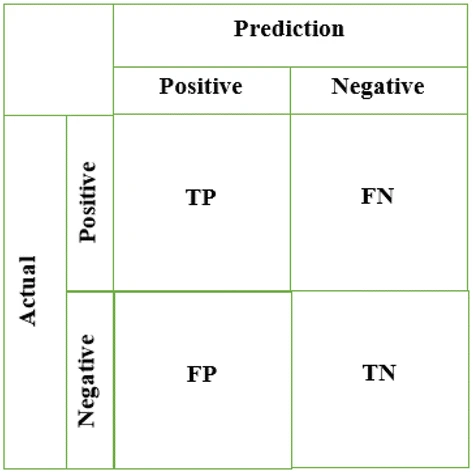

1.
True Positives (TP) is defined by the total number of accurate outputs when the actual class of the data object was True and the prediction was also the True value.

2.
True Negatives (TN) is defined by the total number of accurate outputs when the actual class of the data object was False and the predicted is also the False value.

3.
False Positives (FP) when the actual class of the data object was False and the output value was the True value

4.
False Negatives (FN) when the actual class of the data object was True and the output value was the False value.

Metrics computed from a confusion matrix
A confusion matrix gives a useful information about how well the model does. However, its elements can be used to calculate many performance metrics to get even more information. Among the most popular:

1. Accuracy is the most intuitive performance measure, and defined as the ratio of the number of correctly classified objects to the total number of objects evaluated.

2. Precision it is simply a ratio of correctly predicted positive data objects to the total predicted positive data objects.

3. Recall it is defined by the number of correct positive results divided by the total number of relevant samples (all samples that should have been identified as positive).

4. F-score it can be defined as a weighted average of the precision and recall. An F-score is considered perfect when reaches its best value at 1, while the model is a total failure when it reaches the 0 value.

5. The F-beta-score is a generalization of the F-score that adds a configuration parameter called beta. A default beta value is 1.0, which is the same as the F-score. A smaller beta value, such as 0.5, gives more weight to precision and less to recall, whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score.

(source - https://link.springer.com/article/10.1007/s42452-019-1356-9)

There are few options for performence measure. I decided to choose a combination of two (re-call and percision) using F-beta-score:
$$ re-call = \frac{TP}{TP+FN}$$<br>
$$ precision = \frac{TP}{TP+FP} $$
<br>The re-call must be highest as we can, becaue we need to predict the most stroke cases we can, so that FN will be as close to 0 as posible.<br>
The re-call is much more important than the percision, because we need to first identify as many strokes as possible. Therefore, we will use F beta when beta = 4. Supposedly, re-call is 4 times more important than precision.

$$ Fbeta(4) = \frac{(1+4^2) X precision X recall}{(4^2) X precision+recall} $$

Accuracy will not be appropriate for 2 reasons: a. It is impossible to make sure that we predict all the strokes cases. B. If we define the zero model according to the division of yes/no stroke in the data or if we define that it will always say that there is no stroke - it will succeed in about 95% of the cases (because of the distribution of targets attribute). 95% is a false accuracy that will be very difficult to circumvent.
F-SCORE will not fit because the recall and percision not equal in weight in this task.

# <ins> F. Test Set and Train Test </ins>

### first, I will use StratifiedShuffleSplit to make test set and train set

In [ ]:
X = df.drop(columns=['stroke', 'id'])
Y = df['stroke']
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
for train_index, test_index in split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

### now we have stratified train and test sets

In [ ]:
print(y_train.describe()[:3], y_test.describe()[:3])

### scaling the sets:

The most common techniques of feature scaling are Normalization and Standardization.
Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane. (source - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) 
<br>I will use standardization. why? because the affect of outliers is less significant.

### note: it is important to scaling the test set by the train set!

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#### scaling the numerical features of X_train

In [ ]:
scaler.fit(X_train[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])

X_train_scaled.describe()

- we can see that, approximatly, the mean is 0 and the std is 1.

#### scaling the numerical features of X_train


In [ ]:
# the scaling is with the the same fitted scaler (by the train data)
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

### Now we have scaled test set and train set, we can continue to find a good model!
<br> <br>

In [ ]:
# This function will serve us well in the next section:

def cf_matrix_show(cf_matrix, beta = 4):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    fb_score  = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nFb Score={:0.3f}".format(
                    accuracy,precision,recall,f1_score, fb_score)

    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)

# <ins> G. K-NN Model </ins>

### note: the next steps are not correct, I will show them for make the process understandable.I will also provide explanations for those mistakes to show my way of thinking and progress in finding a good model.

### although acurracy is not the our measure method, I started with this to get some information about the best k for the model. this is the first mistake.
#### find the best k for the model using train set and test set:

In [ ]:
# try K=1 through K=30 and plot testing accuracy
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- note: scoring by train-test provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.

More over, it is clear that using a test set can reflect over-fitting to the test data so we will use the training data.
    #### find the best k for the model using only the train set and testing using it:

In [ ]:
# try K=1 through K=30 and plot testing accuracy
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled)
    scores.append(metrics.accuracy_score(y_train, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
max_score = max(scores)
best_K = scores.index(max(scores))+1

print("the first k value with best score is " + str(best_K) + " with accuracy of " + str(max_score))

Obviously such a test can reflect over-fitting. Therefor, I will use cross-validation. advantage of this method - it is more "efficient" use of data (every observation is used for both training and testing).
#### find the best k for the model by cross-validation:

In [ ]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
((ax1, ax2)) = ax

ax1.plot(k_range, k_mean_scores)
ax1.set_title('mean acurracy by K')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Testing Mean Accuracy')

ax2.plot(k_range, k_std_scores)
ax2.set_title('std scores by K')
ax2.set_xlabel('Value of K for KNN')
ax2.set_ylabel('Testing STD')

plt.tight_layout()
plt.show()

max_score = max(k_mean_scores)
min_std = min(k_std_scores)
best_Ks = Ks[(Ks['k_mean']==max_score) & (Ks['k_std']==min_std)]
print("best mean acuarracy is: " +str(max_score))
print("the best K's are:")
print(best_Ks)
print("in this case I will choose the smallest k between those K's for the model, to make it the as simple as we can.")

In [ ]:
min(best_Ks['k_mean'].index)

### features selection - is there feature that is not necceserily? maybe even it harms the model?

In [ ]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []

features = list(X_train_scaled.columns.values)
for feature in features:
    knn = KNeighborsClassifier(n_neighbors= min(best_Ks['k_mean'].index))
    scores = cross_val_score(knn, X_train_scaled.drop(columns=feature), y_train, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())



In [ ]:
# check if there is an feature worthe to remove
fig = plt.gcf()
plt.plot(features, k_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(rotation='vertical')

fig.set_size_inches(18.5, 10.5)

This plot made me realize that there is a significant problem. How can it be that when significant features such as age are removed, the accuracy of the model does not fall?
Some conclusions:
- The use of an accuracy test is also not suitable for an initial test because this is not the purpose of the model.
- More importantly - my model functions like a stupid model if I use an accuracy test! It almost completely predicts that there is simply no stroke.
- Perhaps most importantly - unbalanced classes. The model behaves like a stupid model because there are unbalanced classes. There are only 5% of strokes and the model almost completely ignores them by simply stating that there is always no stroke and thus achieving supposedly very high accuracy percentages.

#### You can see at the confusion matrix below the problem clearly:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=min(best_Ks['k_mean'].index))
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict))

- this model is just a dummy model! we have to fix the imbalance classes!

The problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.<br>
One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.<br>
An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.<br>
Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”<br>
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.<br>
(source - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)


### Over sample using SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_scaled, y_train)
upsampled_df = X.assign(Stroke = y)

fig, ax = plt.subplots(1,1, figsize = (12,12))
labels = ["deosn't have stroke", "have stroke"]
values = upsampled_df['Stroke'].value_counts().tolist()

ax.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax.set_title("stroke ratio - after over sampeling:", fontdict={'fontsize': 15})
plt.show()
print("there are now equal number of cases with stroke and without: " +str(values))

In [ ]:
# split the target and features
X_train_scaled_upsample = upsampled_df.drop(columns='Stroke')
y_train_upsamle = upsampled_df['Stroke']

### define dummy model:

In [ ]:
print("here we can se the 95% as false accuracy, without any true positive, so this is useless dummy model.")

plt.subplot(1,2,1)
plt.title('most_frequent (not have stroke always)')
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.subplot(1,2,2)
plt.title('constant (have stroke)')
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X_train_scaled, y_train)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1,2,1)
plt.title('stratified')
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train_scaled, y_train)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.subplot(1,2,2)
plt.title('uniform')
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_scaled_upsample, y_train_upsamle)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.tight_layout()
plt.show()

#### after define our dummy models, how would look an ideal model?

In [ ]:
# ideal result
cf_matrix_show(confusion_matrix(y_test, y_test))

we want to get the highest F-beta we can. so:
- first, we want to get the highest recall we can
- second, we want to get the highest precision we can

#### let's find our KNN model!
note: we cant use the data after upsample for testing our model because it is balanced compared to the TEST SET which is unbalanced. more over, Even if we use the training data before over-sampling, so the ratio is the same, there is a risk of making a mistake due to over-fitting.
- example:

In [ ]:
# try K=1 through K=130 and plot testing F-beta
k_range = list(range(1, 131, 15))
beta=4

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_upsample, y_train_upsamle)
    y_pred = knn.predict(X_test_scaled)
    scores.append(metrics.fbeta_score(y_test, y_pred, beta=beta))
plt.plot(k_range, scores)

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_upsample, y_train_upsamle)
    y_pred = knn.predict(X_train_scaled_upsample)
    scores.append(metrics.fbeta_score(y_train_upsamle, y_pred, beta=beta))
plt.plot(k_range, scores)

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_upsample, y_train_upsamle)
    y_pred = knn.predict(X_train_scaled)
    scores.append(metrics.fbeta_score(y_train, y_pred, beta=beta))
    
plt.plot(k_range, scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('F beta')
plt.legend(labels=['test set', 'upsample train set', 'non-upsample train set'])
plt.show()

### The solution is to use cross-validation and only after the split do over-sampling!
- I will use imblearn.pipeline.make_pipeline for this task.

In [ ]:
from imblearn.pipeline import make_pipeline

beta = 4
k_range = range(1,180, 15)
kf = KFold(n_splits=5, random_state=42, shuffle=True)

recall_scores = []
precision_scores = []
Fb_scores = []

for k in k_range:
    imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= k))

    
    recall = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='recall', cv=kf).mean()
    recall_scores.append(recall)
    precision = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='precision', cv=kf).mean()
    precision_scores.append(precision)
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    Fb_scores.append(fb_score)

pd.set_option('display.max_rows', df.shape[0]+1)    
d = {'Fb': Fb_scores, 'recall': recall_scores, 'precision': precision_scores}
Ks = pd.DataFrame(data = d, index=k_range)
Ks

### before selecting our best K, I will check if there are a features that can be removed:
- I will remove features using linear correlation.

In [ ]:
beta = 4
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_range = range(1 ,161, 10)
corr_limits = [0, 0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1]

Fb_mean = []
Fb = []

for limit in corr_limits:
    X_tr_copy = X_train_scaled.copy()
    corr_matrix = df_result.corr()
    stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
    s = (stroke_corr < limit)&(stroke_corr>-limit)
    s.drop(labels=['id', 'stroke'], inplace=True)
    X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

    Fb_scores = []
    
    for k in k_range:
        imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                                  KNeighborsClassifier(n_neighbors= k))

        recall = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='recall', cv=kf).mean()
        precision = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='precision', cv=kf).mean()
        fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
        Fb_scores.append(fb_score)
    
    Fb_mean.append(sum(Fb_scores)/len(Fb_scores))
    Fb.append(Fb_scores)


In [ ]:
d = {'Fb': Fb_mean}
corr_lim_Fb = pd.DataFrame(data = d, index=corr_limits)
best_corr_lim = corr_lim_Fb['Fb'].idxmax()
best_mean_Fb = corr_lim_Fb['Fb'].max()
print("best correlation limit is: " + str(best_corr_lim) + " , with mean F-beta of " + str(best_mean_Fb))
corr_lim_Fb


let's take a look at the F-beta scores with this corralation limit!

In [ ]:
recall_scores = []
precision_scores = []
Fb_scores = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

k_range = range(1 ,161)
for k in k_range:
    imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= k))
    
    recall = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='recall', cv=kf).mean()
    recall_scores.append(recall)
    precision = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='precision', cv=kf).mean()
    precision_scores.append(precision)
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    Fb_scores.append(fb_score)  

pd.set_option('display.max_rows', df.shape[0]+1)    
d = {'Fb': Fb_scores, 'recall': recall_scores, 'precision': precision_scores}
Ks_best_corr_lim = pd.DataFrame(data = d, index=k_range)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(k_range, recall_scores)
plt.plot(k_range, precision_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('re-call VS precision score')

print("re-call VS precision score by k:")

plt.show()

In [ ]:
best_Fb = Ks_best_corr_lim['Fb'].max()
best_K = Ks_best_corr_lim['Fb'].idxmax()
print("best K is: " + str(best_K) + " , with Fbeta of " + str(best_Fb))
Ks_best_corr_lim

In [ ]:
print("here it is:")
Ks_best_corr_lim.loc[[best_K]]

#### fine tuning by choosing best treshold:

In [ ]:
best_imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= best_K))

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

predict_probability = cross_val_predict(best_imba_pipeline, X_tr_copy, y_train, cv=kf, method='predict_proba')
predict_probability

# keep probabilities for the positive outcome only
stroke_prob = predict_probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, stroke_prob)
# convert to f-beta score
fb_score = ((1+beta**2) * precision * recall) / ((beta**2)*precision + recall)
# locate the index of the largest fb score
np.nan_to_num(fb_score, nan=0, copy=False)
ix = fb_score.argmax(axis=0)

print('Best Threshold = %f with Fb-Score of %.3f' % (thresholds[ix], fb_score[ix]))

### test the final model:

In [ ]:
best_imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= best_K))
limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

best_imba_pipeline.fit(X_tr_copy, y_train)
y_prob = best_imba_pipeline.predict_proba(X_test_copy)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
y_predict = np.where(y_prob < thresholds[ix], 0, 1)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

- We can see that we found 82% of the stroke cases, which is pretty good! The cost is that the model indicates about 33% as having stroke. However, this is a significant improvement, because in data 1/20 is a case with a stroke and the model improves the ratio to about 1/8. Not bad at all.

### we can see that the fine tuning (choosing threshold) was good, because without it - the score is lower:

In [ ]:
limit = best_corr_lim
X_tr_copy = X_train_scaled_upsample.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

knn = KNeighborsClassifier(n_neighbors=best_K)
knn.fit(X_tr_copy, y_train_upsamle)
y_predict = knn.predict(X_test_copy)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

## Can we push the model even further?

In [ ]:
limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

In [ ]:
from imblearn.pipeline import Pipeline

imba_pipeline = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', KNeighborsClassifier())])

### using grid-search:

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f_4_scorer = make_scorer(fbeta_score, beta=4)

knn_param_grid = [
    
    {
     'classification__n_neighbors': list(range(20,261)),
     'classification__weights':['uniform','distance'],
     'classification__metric': ['euclidean','manhattan','minkowski'],
    }
    
]

grid_search_knn = GridSearchCV(
    imba_pipeline,
    param_grid=knn_param_grid,
    cv=kf,
    scoring=f_4_scorer,
    return_train_score=True,
)
grid_search_knn.fit(X=X_tr_copy,y=y_train)

In [ ]:
grid_search_knn.best_score_

In [ ]:
best = grid_search_knn.best_estimator_
best

In [ ]:
best_knn_pipeline = make_pipeline(SMOTE(random_state=42), 
                              best)

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

best_knn_pipeline.fit(X_tr_copy, y_train)
y_predict = best.predict(X_test_copy)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

#### find best threshold:

In [ ]:
best_knn_pipeline = make_pipeline(SMOTE(random_state=42), 
                              best)
limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

predict_probability = cross_val_predict(best_knn_pipeline, X_tr_copy, y_train, cv=kf, method='predict_proba')

beta=4
# keep probabilities for the positive outcome only
stroke_prob = predict_probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, stroke_prob)
# convert to f-beta score
fb_score = ((1+beta**2) * precision * recall) / ((beta**2)*precision + recall)
# locate the index of the largest fb score
np.nan_to_num(fb_score, nan=0, copy=False)
ix = fb_score.argmax(axis=0)

print('Best Threshold = %f with Fb-Score of %.3f' % (thresholds[ix], fb_score[ix]))

In [ ]:
# test the final model:

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

best_knn_pipeline.fit(X_tr_copy, y_train)
y_prob = best.predict_proba(X_test_copy)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
y_predict = np.where(y_prob <= thresholds[ix], 0, 1)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)


- so the grid search didn't help as we hope.
### the best KNN model is:

In [ ]:
list(best_imba_pipeline)[1].get_params()

# Random Forest Classifier

### First try - I will try random forest randomly - I will use alse the test set sometimes just to understand the base and where are we standing.
note: I will use n=200 randomly just to check in generalize.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200) # randomly choose
clf.fit(X_train_scaled_upsample, y_train_upsamle)
 
# Predict on training set
pred_y = clf.predict(X_train_scaled) 

# How's our Fbeta?
print('on train-set scores (over-fitting):')
print('test-set')
print('Fb: '+ str(metrics.fbeta_score(y_train, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_train, pred_y)) )
print('precision:' + str(metrics.precision_score(y_train, pred_y)) )
print()

# Predict on training set
pred_y = clf.predict(X_test_scaled)

# How's our Fbeta?
print('on test-set scores (very low):')
print('Fb: '+ str(metrics.fbeta_score(y_test, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_test, pred_y)) )
print('precision:' + str(metrics.precision_score(y_test, pred_y)) )
print()

In [ ]:
#### feature importance:

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train_scaled_upsample.columns).sort_values(ascending=False)
feature_imp

- there is a big difference between importance list to linear correlation list ! for example, BMI is important as we saw in the data analysis.
#### feature selection by importance:

In [ ]:
# copy X with columns wich grater than limit:
def copy_by_imp_limit(X, lim, limits):
    X_copy = X.copy()
    s = (feature_imp < lim)
    X_copy = X_copy[X_copy.columns[~s]]
    return X_copy

In [ ]:
def Fb_recall_precision(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    fb_score = metrics.fbeta_score(y_test, pred_y, beta=4) 
    recall = metrics.recall_score(y_test, pred_y) 
    precision = metrics.precision_score(y_test, pred_y)
    return fb_score, recall, precision

beta = 4
kf = KFold(n_splits=5, random_state=42, shuffle=True)
def Fb_recall_precision_CV(model, X_train, y_train):
    recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=kf).mean()
    precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=kf).mean()
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    return fb_score, recall, precision

In [ ]:
def df_Fb_recall_precision(Fb_list, recall_list, precision_list):
    d = {'Fb': Fb_list, 'recall': recall_list, 'precision': precision_list}
    return pd.DataFrame(data = d, index=importance_limit)

In [ ]:
importance_limit = [0, 0.01, 0.02, 0.04, 0.13, 0.132, 0.14]
    
Fb_list = []
recall_list = []
precision_list = []

for limit in importance_limit:
    X_tr_copy = copy_by_imp_limit(X_train_scaled_upsample, limit, feature_imp)
    X_test_copy = copy_by_imp_limit(X_test_scaled, limit, feature_imp)
    
    fb_score, recall, precision = Fb_recall_precision(clf, X_tr_copy, y_train_upsamle, X_test_copy, y_test)

    Fb_list.append(fb_score)
    recall_list.append(recall)
    precision_list.append(precision)
    

In [ ]:
df_scores_limits = df_Fb_recall_precision(Fb_list, recall_list, precision_list)
best_imp_lim = df_scores_limits['Fb'].idxmax()
best_imp_Fb = df_scores_limits['Fb'].max()
df_scores_limits

In [ ]:
print("best importance limit is: " + str(best_imp_lim) + " , with mean F-beta of " + str(best_imp_Fb))

## this is amazing! 3 features are all what we need! 
### now, let's do it the right way - using pipline, smote and cross_validation.

- I will use random seacrh to idenify to ranges of best parameters.

In [ ]:
from imblearn.pipeline import Pipeline

f_4_scorer = make_scorer(fbeta_score, beta=4)
imba_pipeline_RFC = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', RandomForestClassifier())])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'classification__n_estimators': n_estimators,
               'classification__max_features': max_features,
               'classification__max_depth': max_depth,
               'classification__min_samples_split': min_samples_split,
               'classification__min_samples_leaf': min_samples_leaf,
               'classification__bootstrap': bootstrap}

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
# search across 100 different combinations, and use all availimba_pipelineores
rf_random = RandomizedSearchCV(estimator = imba_pipeline_RFC, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring=f_4_scorer)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

In [ ]:
print("best score is:")
print(rf_random.best_score_)

In [ ]:
print("current best params:")
rf_random.best_params_

#### although this is not by the book, I will use the test set so we can understand where we're standing:

In [ ]:
rf = rf_random.best_estimator_
rf.fit(X_train_scaled_upsample, y_train_upsamle)
y_predict = rf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

#### lets push this model higher:

- take a look at the importances list:

In [ ]:
current_best_model = list(rf)[1]
feature_imp = pd.Series(current_best_model.feature_importances_,index=X_train_scaled_upsample.columns).sort_values(ascending=False)
feature_imp

#### Find best importance limit using cross validation (and not the test set):

In [ ]:
importance_limit = [0, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.083, 0.09]  
    
Fb_list = []
recall_list = []
precision_list = []

current_best_pipeline_RFC = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', current_best_model)])

for limit in importance_limit:
    X_tr_copy = copy_by_imp_limit(X_train_scaled, limit, feature_imp)
    
    Fb_score, recall, precision = Fb_recall_precision_CV(current_best_pipeline_RFC, X_tr_copy, y_train)

    Fb_list.append(Fb_score)
    recall_list.append(recall)
    precision_list.append(precision)

limits = df_Fb_recall_precision(Fb_list, recall_list, precision_list)
limits

#### - this is awasome! such a dimentionality reduction!<br> just by the age we can get F-beta of 0.557 and find 70% of the stroke cases!

#### test this model:

In [ ]:
X_train_copy = copy_by_imp_limit(X_train_scaled, 0.09, feature_imp)
X_test_copy = copy_by_imp_limit(X_test_scaled, 0.09, feature_imp)

current_best_pipeline_RFC.fit(X_train_copy, y_train)
y_predict = current_best_pipeline_RFC.predict(X_test_copy)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

- this score is great and use only one feature!
- but, we can do even better if we take a step.
### I will find better model using the grid search<br> with the knowledge from the random search:

#### this is the 5 best models that the random search found:

In [ ]:
main_scores = pd.DataFrame(rf_random.cv_results_)[['rank_test_score', 'mean_test_score', 'std_test_score', 'param_classification__n_estimators', 'param_classification__min_samples_split', 'param_classification__min_samples_leaf', 'param_classification__max_features', 'param_classification__max_depth', 'param_classification__bootstrap']]
main_scores.sort_values(by=['rank_test_score']).head()

best params:
- n_estimators: 200 and 400 (lowest).
- min_samples_split: both (2,5).
- min_samples_leaf: 4 (highest).
- max_features: both.
- max_depth: 10 (lowest).
- bootstrap: True.

I will check around those results using grid search:

### grid search for best hyperparameter:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 100)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [5, 10]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6,8]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the param grid
rfc_param_grid = [{'classification__n_estimators': n_estimators,
               'classification__max_features': max_features,
               'classification__max_depth': max_depth,
               'classification__min_samples_split': min_samples_split,
               'classification__min_samples_leaf': min_samples_leaf,
               'classification__bootstrap': bootstrap}]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop = 500, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6, 10]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,8]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the param grid
rfc_param_grid = [{'classification__n_estimators': n_estimators,
               'classification__max_features': max_features,
               'classification__max_depth': max_depth,
               'classification__min_samples_split': min_samples_split,
               'classification__min_samples_leaf': min_samples_leaf,
               'classification__bootstrap': bootstrap}]

In [ ]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)

grid_search_RFC = GridSearchCV(
    imba_pipeline_RFC,
    param_grid=rfc_param_grid,
    cv=kf,
    scoring=f_4_scorer,
    return_train_score=True,
)
grid_search_RFC.fit(X_train_scaled, y_train)

## top 5 usind grid search:

In [ ]:
main_RFC_scores = pd.DataFrame(grid_search_RFC.cv_results_)[['rank_test_score', 'mean_test_score', 'std_test_score', 'param_classification__n_estimators', 'param_classification__min_samples_split', 'param_classification__min_samples_leaf', 'param_classification__max_features', 'param_classification__max_depth', 'param_classification__bootstrap']]
main_RFC_scores.sort_values(by=['rank_test_score']).head()

## best score:

In [ ]:
grid_search_RFC.best_score_

In [ ]:
print("best params:")
grid_search_RFC.best_params_

### test:

In [ ]:
best_RFC = grid_search_RFC.best_estimator_
best_pipeline_RFC = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', best_RFC)])

best_pipeline_RFC.fit(X_train_scaled, y_train)
y_pred = best_pipeline_RFC.predict(X_test_scaled)

cf_matrix_show(confusion_matrix(y_test, y_pred), beta=4)

##  feature selecting

- take a look at the importances list:

In [ ]:
best_rfc_model = list(best_RFC)[1]
feature_imp = pd.Series(best_rfc_model.feature_importances_,index=X_train_scaled_upsample.columns).sort_values(ascending=False)
feature_imp

#### Find best importance limit using cross validation (and not the test set):

In [ ]:
importance_limit = [0, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.065, 0.08, 0.11]  
    
Fb_list = []
recall_list = []
precision_list = []

current_best_pipeline_RFC = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', best_rfc_model)])

for limit in importance_limit:
    X_tr_copy = copy_by_imp_limit(X_train_scaled, limit, feature_imp)
    X_test_copy = copy_by_imp_limit(X_test_scaled, limit, feature_imp)
    
    Fb_score, recall, precision = Fb_recall_precision_CV(current_best_pipeline_RFC, X_tr_copy, y_train)

    Fb_list.append(Fb_score)
    recall_list.append(recall)
    precision_list.append(precision)

limits = df_Fb_recall_precision(Fb_list, recall_list, precision_list)
limits

#### test this model:

In [ ]:
X_train_copy = copy_by_imp_limit(X_train_scaled, 0.015, feature_imp)
X_test_copy = copy_by_imp_limit(X_test_scaled, 0.015, feature_imp)

best_pipeline_RFC.fit(X_train_copy, y_train)
y_predict = best_pipeline_RFC.predict(X_test_copy)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

## Best  Threshold:

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
predict_probability = cross_val_predict(best_pipeline_RFC, X_train_copy, y_train, cv=kf, method='predict_proba')
beta=4
# keep probabilities for the positive outcome only
stroke_prob = predict_probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, stroke_prob)
# convert to f-beta score
fb_score = ((1+beta**2) * precision * recall) / ((beta**2)*precision + recall)
# locate the index of the largest fb score
np.nan_to_num(fb_score, nan=0, copy=False)
ix = fb_score.argmax(axis=0)

print('Best Threshold = %f with Fb-Score of %.3f' % (thresholds[ix], fb_score[ix]))

## final Random Forest Classifier model:

In [ ]:
best_pipeline_RFC.fit(X_train_copy, y_train)
y_prob = best_pipeline_RFC.predict_proba(X_test_copy)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]

y_predict = np.where(y_prob <= thresholds[ix], 0, 1)
cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

- it was a nice try, but feature selection and threshold choosing didn't help as so much.
- maybe better solution will be to insert the feture-selection step into the grid-search because every model use the params and the features differently.<br>I would have do that, but my computer barely survived this grid_search so it will stay as future mision.

# <ins> I. Best model is: </ins>

## this is a little bit shocking - our best model is using only the age feature!
- with F beta of ~0.62, this model find 80% of the stroke cases.

with those params:


In [ ]:
current_best_model.get_params()


In [ ]:
current_best_model

## Thanks for reading!
### I would love to get comments, reviews and suggestions for improvement!